## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)

    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [6]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 100us/step - loss: 2.2704 - accuracy: 0.1376 - val_loss: 2.2181 - val_accuracy: 0.1906
Epoch 2/500
50000/50000 [==============================] - 5s 108us/step - loss: 2.1847 - accuracy: 0.2131 - val_loss: 2.1551 - val_accuracy: 0.2329
Epoch 3/500
50000/50000 [==============================] - 5s 101us/step - loss: 2.1299 - accuracy: 0.2478 - val_loss: 2.1063 - val_accuracy: 0.2638
Epoch 4/500
50000/50000 [==============================] - 5s 98us/step - loss: 2.0856 - accuracy: 0.2715 - val_loss: 2.0659 - val_accuracy: 0.2757
Epoch 5/500
50000/50000 [==============================] - 5s 99us/step - loss: 2.0483 - accuracy: 0.2857 - val_loss: 2.0312 - val_accuracy: 0.2936
Epoch 6/500
50000/50000 [==============================] - 5s 104us/step - loss: 2.0172 - accuracy: 0.2959 - val_loss: 2.0030 - val_accuracy: 0.2989
Epoch 7/500
50000/50000 [==============================] -

50000/50000 [==============================] - 5s 97us/step - loss: 1.6621 - accuracy: 0.4229 - val_loss: 1.6710 - val_accuracy: 0.4197
Epoch 56/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.6592 - accuracy: 0.4245 - val_loss: 1.6692 - val_accuracy: 0.4145
Epoch 57/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.6560 - accuracy: 0.4265 - val_loss: 1.6651 - val_accuracy: 0.4176
Epoch 58/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.6530 - accuracy: 0.4258 - val_loss: 1.6617 - val_accuracy: 0.4206
Epoch 59/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.6501 - accuracy: 0.4275 - val_loss: 1.6596 - val_accuracy: 0.4224
Epoch 60/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.6471 - accuracy: 0.4283 - val_loss: 1.6554 - val_accuracy: 0.4186
Epoch 61/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.6441 - accuracy: 0.4299 - val_loss: 

50000/50000 [==============================] - 5s 96us/step - loss: 1.5283 - accuracy: 0.4692 - val_loss: 1.5575 - val_accuracy: 0.4578
Epoch 111/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.5264 - accuracy: 0.4689 - val_loss: 1.5532 - val_accuracy: 0.4555
Epoch 112/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.5246 - accuracy: 0.4698 - val_loss: 1.5534 - val_accuracy: 0.4538
Epoch 113/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.5227 - accuracy: 0.4707 - val_loss: 1.5526 - val_accuracy: 0.4558
Epoch 114/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.5209 - accuracy: 0.4714 - val_loss: 1.5509 - val_accuracy: 0.4557
Epoch 115/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.5190 - accuracy: 0.4718 - val_loss: 1.5474 - val_accuracy: 0.4587
Epoch 116/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.5169 - accuracy: 0.4741 - val_

Epoch 165/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.4369 - accuracy: 0.5022 - val_loss: 1.4903 - val_accuracy: 0.4736
Epoch 166/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.4360 - accuracy: 0.5027 - val_loss: 1.4888 - val_accuracy: 0.4772
Epoch 167/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.4337 - accuracy: 0.5032 - val_loss: 1.4855 - val_accuracy: 0.4772
Epoch 168/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.4326 - accuracy: 0.5032 - val_loss: 1.4834 - val_accuracy: 0.4776
Epoch 169/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.4309 - accuracy: 0.5046 - val_loss: 1.4832 - val_accuracy: 0.4760
Epoch 170/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.4299 - accuracy: 0.5055 - val_loss: 1.4858 - val_accuracy: 0.4798
Epoch 171/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.4280 - accuracy:

50000/50000 [==============================] - 5s 95us/step - loss: 1.3605 - accuracy: 0.5276 - val_loss: 1.4443 - val_accuracy: 0.4827
Epoch 220/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.3584 - accuracy: 0.5291 - val_loss: 1.4396 - val_accuracy: 0.4915
Epoch 221/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.3571 - accuracy: 0.5298 - val_loss: 1.4482 - val_accuracy: 0.4902
Epoch 222/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.3564 - accuracy: 0.5297 - val_loss: 1.4486 - val_accuracy: 0.4894
Epoch 223/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.3548 - accuracy: 0.5296 - val_loss: 1.4360 - val_accuracy: 0.4915
Epoch 224/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.3532 - accuracy: 0.5318 - val_loss: 1.4355 - val_accuracy: 0.4923
Epoch 225/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.3523 - accuracy: 0.5315 - val_

Epoch 274/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.2905 - accuracy: 0.5514 - val_loss: 1.4012 - val_accuracy: 0.5051
Epoch 275/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.2888 - accuracy: 0.5506 - val_loss: 1.3981 - val_accuracy: 0.5065
Epoch 276/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.2879 - accuracy: 0.5524 - val_loss: 1.4038 - val_accuracy: 0.5058
Epoch 277/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.2869 - accuracy: 0.5532 - val_loss: 1.4010 - val_accuracy: 0.5034
Epoch 278/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.2852 - accuracy: 0.5529 - val_loss: 1.4005 - val_accuracy: 0.5078
Epoch 279/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.2843 - accuracy: 0.5534 - val_loss: 1.4032 - val_accuracy: 0.5020
Epoch 280/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.2829 - accuracy:

50000/50000 [==============================] - 5s 101us/step - loss: 1.2278 - accuracy: 0.5734 - val_loss: 1.3794 - val_accuracy: 0.5131
Epoch 329/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.2264 - accuracy: 0.5721 - val_loss: 1.3812 - val_accuracy: 0.5140
Epoch 330/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.2264 - accuracy: 0.5722 - val_loss: 1.4055 - val_accuracy: 0.5084
Epoch 331/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.2239 - accuracy: 0.5741 - val_loss: 1.3770 - val_accuracy: 0.5131
Epoch 332/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.2233 - accuracy: 0.5756 - val_loss: 1.3743 - val_accuracy: 0.5127
Epoch 333/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.2226 - accuracy: 0.5741 - val_loss: 1.3767 - val_accuracy: 0.5095
Epoch 334/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.2209 - accuracy: 0.5751 - val

50000/50000 [==============================] - 5s 96us/step - loss: 1.1687 - accuracy: 0.5936 - val_loss: 1.3602 - val_accuracy: 0.5151
Epoch 383/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.1671 - accuracy: 0.5960 - val_loss: 1.3816 - val_accuracy: 0.5103
Epoch 384/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.1670 - accuracy: 0.5938 - val_loss: 1.3591 - val_accuracy: 0.5133
Epoch 385/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.1658 - accuracy: 0.5933 - val_loss: 1.3793 - val_accuracy: 0.5112
Epoch 386/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.1659 - accuracy: 0.5937 - val_loss: 1.3582 - val_accuracy: 0.5179
Epoch 387/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.1632 - accuracy: 0.5945 - val_loss: 1.3689 - val_accuracy: 0.5161
Epoch 388/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.1637 - accuracy: 0.5967 - val_

Epoch 437/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.1120 - accuracy: 0.6119 - val_loss: 1.3643 - val_accuracy: 0.5213
Epoch 438/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.1084 - accuracy: 0.6156 - val_loss: 1.3443 - val_accuracy: 0.5248
Epoch 439/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.1098 - accuracy: 0.6153 - val_loss: 1.3488 - val_accuracy: 0.5238
Epoch 440/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.1077 - accuracy: 0.6152 - val_loss: 1.3507 - val_accuracy: 0.5209
Epoch 441/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.1070 - accuracy: 0.6154 - val_loss: 1.3443 - val_accuracy: 0.5242
Epoch 442/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.1066 - accuracy: 0.6145 - val_loss: 1.3697 - val_accuracy: 0.5127
Epoch 443/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.1056 - accuracy:

50000/50000 [==============================] - 5s 96us/step - loss: 1.0566 - accuracy: 0.6328 - val_loss: 1.3773 - val_accuracy: 0.5106
Epoch 492/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.0529 - accuracy: 0.6345 - val_loss: 1.3740 - val_accuracy: 0.5193
Epoch 493/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.0536 - accuracy: 0.6347 - val_loss: 1.3539 - val_accuracy: 0.5224
Epoch 494/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.0526 - accuracy: 0.6338 - val_loss: 1.3571 - val_accuracy: 0.5176
Epoch 495/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.0511 - accuracy: 0.6369 - val_loss: 1.4051 - val_accuracy: 0.5074
Epoch 496/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.0500 - accuracy: 0.6354 - val_loss: 1.3483 - val_accuracy: 0.5251
Epoch 497/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.0495 - accuracy: 0.6362 - val_

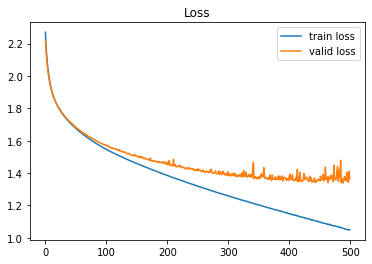

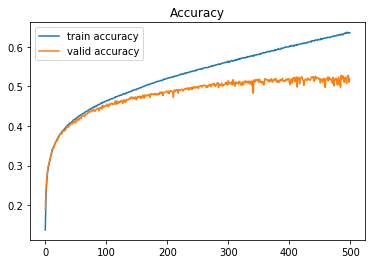

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()